In [1]:
using Distributions
using Plots

# Exercise 1.2

Show that the error probability is reduced by the use of $R_3$ by computing the error probability of this code for a binary symmetric channel with noise level $f$.

When using $R_3$, decoding errors only happen if 2 or 3 bits flip.

The binomial distribution tells us how likely $k$ bit flips are in $n$ bits, with noise level $f$.

$
binomial(k|n,f) = {n \choose k} \ f^k \ (1-f)^{n-k}
$

So the probability of 2 or 3 bits flipping is: $binomial(2|3,f) + binomial(3|3,f)$

$
binomial(2|3,f) + binomial(3|3,f)
\\
= {3 \choose 2} \ f^2 \ (1-f)^{3-2} + {3 \choose 3} \ f^3 \ (1-f)^{3-3}
\\
= 3f^2 \ (1-f)^{3-2} + f^3
\\
= 3f^2 - 3f^3 + f^3
\\
= 3f^2 - 2f^3
$

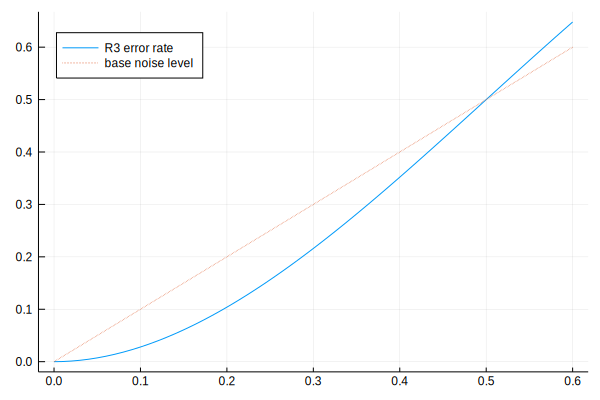

In [2]:
domain = 0:0.01:0.6
plot(domain, f -> 3f^2 - 2f^3, label="R3 error rate", legend=:topleft)
plot!(domain, f -> f, label="base noise level", linestyle=:dot)

# Exercise 1.3
Which term of $R_N$ is largest, and how much larger than other terms is it?

Approximate the error rate of $R_N$.

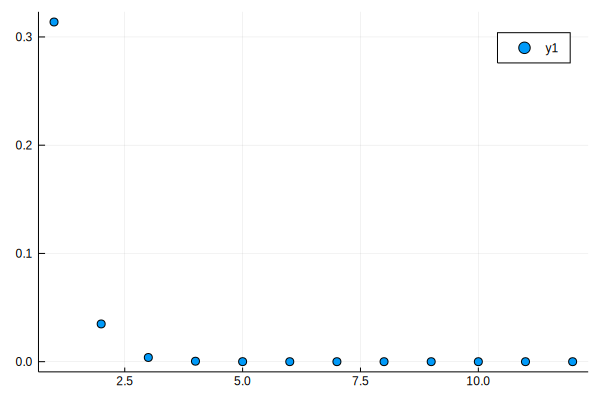

In [3]:
N = 11
f = 0.1
xs = map(n -> f^n * (1-f)^(N-n), 0:N)
scatter(xs)

In [4]:
map(i -> xs[i] / xs[i+1], 1:length(xs)-1)

11-element Array{Float64,1}:
 9.0              
 8.999999999999998
 9.0              
 9.0              
 9.0              
 9.0              
 9.0              
 8.999999999999998
 9.000000000000002
 9.0              
 9.0              

For $f = 0.1$ the dominant term in the sum is 9 times larger than any other term.

The relative value of the dominante term depends on $f$.

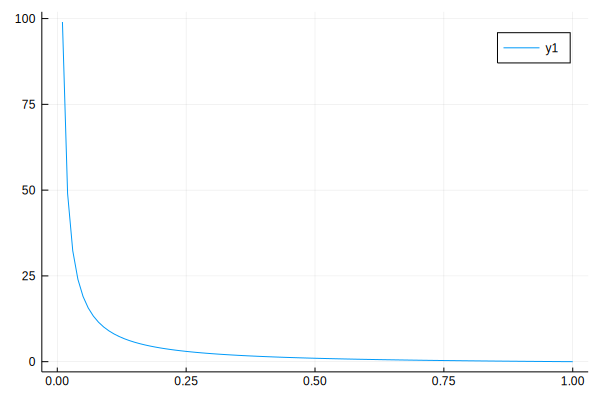

In [5]:
plot(0:0.01:1, x -> (x * (1-x)^-1)^-1)

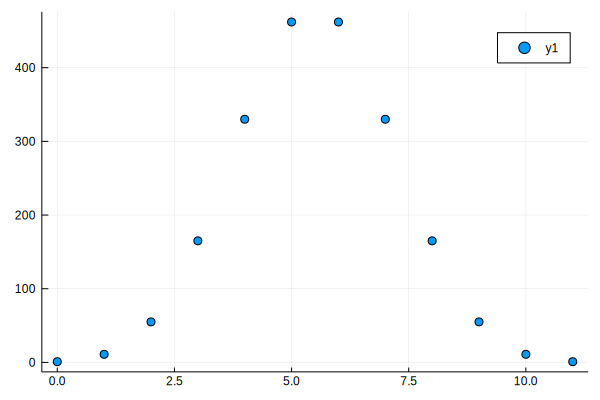

In [6]:
scatter(0:11, k -> binomial(11, Int(k)))

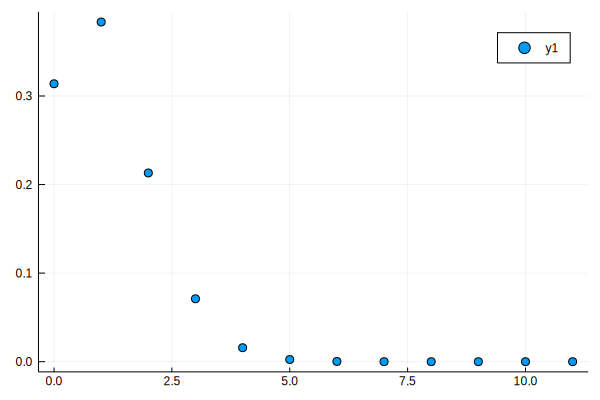

In [7]:
N = 11
f = 0.1
scatter(0:N, n -> pdf.(Binomial(N, f), n))

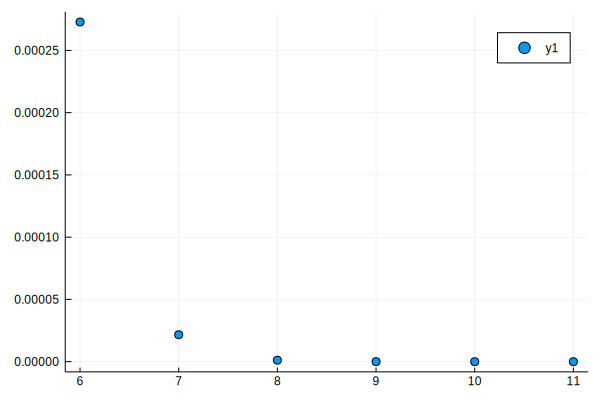

In [8]:
N = 11
f = 0.1
scatter((N+1)/2:N, n -> pdf.(Binomial(N, f), n))

In [9]:
bs = map(n -> binomial(Int(n), Int((n+1)/2)), 1:2:51)

26-element Array{Int64,1}:
               1
               3
              10
              35
             126
             462
            1716
            6435
           24310
           92378
          352716
         1352078
         5200300
        20058300
        77558760
       300540195
      1166803110
      4537567650
     17672631900
     68923264410
    269128937220
   1052049481860
   4116715363800
  16123801841550
  63205303218876
 247959266474052

In [10]:
b_growth = map(i -> bs[i+1] / bs[i], 1:length(bs)-1)

25-element Array{Float64,1}:
 3.0               
 3.3333333333333335
 3.5               
 3.6               
 3.6666666666666665
 3.7142857142857144
 3.75              
 3.7777777777777777
 3.8               
 3.8181818181818183
 3.8333333333333335
 3.8461538461538463
 3.857142857142857 
 3.8666666666666667
 3.875             
 3.8823529411764706
 3.888888888888889 
 3.8947368421052633
 3.9               
 3.9047619047619047
 3.909090909090909 
 3.9130434782608696
 3.9166666666666665
 3.92              
 3.923076923076923 

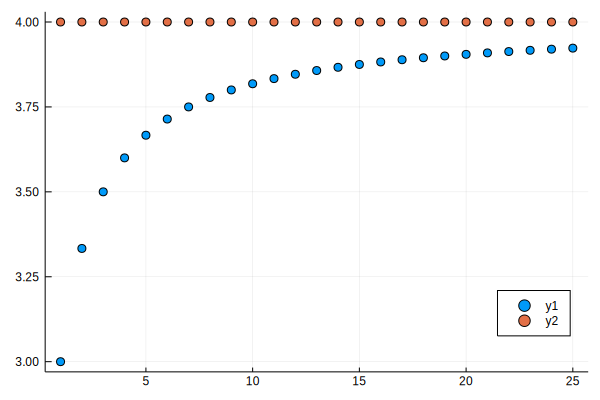

In [11]:
scatter(b_growth, legend=:bottomright)
scatter!(ones(length(b_growth)) * 4)

In [12]:
(.1 * .9) ^ -1

11.111111111111109

${N+2 \choose n+1}$ is about 4 times larger than ${N \choose n}$.

For $f = 0.1$ $f^1\ (1-f)^{2-1}$ divides by 11 for $R_{N+2}$.

So each additional $2N$ in $R_N$ multiplies the error rate by $4/11$.

We are looking for an error rate of $10^{-15}$.

In [13]:
estimate_r(f, target_error_rate) = log(4 * .1 * .9, target_error_rate) * 2
@time estimate_r(0.1, 10^-15)

  0.016129 seconds (54.98 k allocations: 3.305 MiB)


67.61363327915772

It would take roughly $R_{67}$ to reach $10^{-15}$ error rate.

Let's just brute force it.

In [14]:
function error_rate(f, r_n)
    sum(pdf.(Binomial(r_n, f), n) for n in (r_n+1)/2:r_n)
end

error_rate(0.1, 3)

0.028000000000000008

In [15]:
function calculate_r(f, target_error_rate)
    for r_n in 1:2:1001
        if error_rate(f, r_n) <= target_error_rate
            return r_n
        end
    end
end

@time calculate_r(0.1, 10^-15)

  0.012749 seconds (32.09 k allocations: 1.858 MiB)


63

The exact answer is $R_{63}$. Computers are fast.

Let's try some other numbers for fun.

In [16]:
@time estimate_r(0.1, 10^-40)

  0.005045 seconds (6.13 k allocations: 366.775 KiB)


180.30302207775392

In [17]:
@time calculate_r(0.1, 10^-40)

  0.000556 seconds (5 allocations: 176 bytes)


173

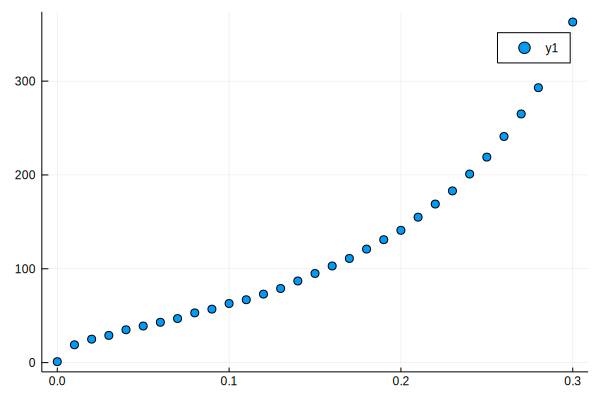

In [18]:
scatter(0:0.01:0.3, f -> calculate_r(f, 10^-15))